### 10x Genomics Visium dataset to study myocardial tissue reorganization following ischemic injury

#### Regions:
1. Control (N=4)
2. Remote Zone (RZ) (N=5)
3. Ischaemic Zone (IZ) (N=8)


The 10x Genomics Visium heart data from Kuppe et al. is available in the Zenodo data repository: https://zenodo.org/record/6578047.

In [1]:
import os
import numpy as np
import scanpy as sc

In [2]:
import graphcompass as gc

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load data

In [4]:
# change as needed
WD = "/data/visium_heart"

In [5]:
adata = sc.read_h5ad(os.path.join(WD, "all.h5ad"))
adata.obs_names_make_unique()
adata

/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/anndata/_core/anndata.py:1906: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 88456 × 11669
    obs: 'n_counts', 'n_genes', 'percent.mt', 'Adipocyte', 'Cardiomyocyte', 'Endothelial', 'Fibroblast', 'Lymphoid', 'Mast', 'Myeloid', 'Neuronal', 'Pericyte', 'Cycling.cells', 'vSMCs', 'cell_type_original', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'ethnicity_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'ethnicity', 'development_stage', 'sample'
    var: 'feature_biotype', 'feature_is_filtered', 'feature_name', 'feature_reference'
    obsm: 'X_pca', 'X_spatial', 'X_umap', 'spatial'

## Inspect data

In [6]:
print(np.max(adata.X))
print(np.min(adata.X))

8.193758
0.0


In [7]:
adata.obs['disease'].value_counts()

disease
myocardial infarction    76757
normal                   11699
Name: count, dtype: int64

In [8]:
adata.obs['sex'].value_counts()

sex
female    62451
male      26005
Name: count, dtype: int64

In [9]:
adata.obs['sample'].value_counts()

sample
RZ_BZ_P3         4659
control_P1       4269
FZ_GT_P4         4253
IZ_BZ_P2         4203
GT_IZ_P9         4113
GT_IZ_P9_rep2    4113
IZ_P3            3771
IZ_P10           3646
RZ_P9            3626
GT_IZ_P15        3572
RZ_GT_P2         3538
RZ_P6            3484
RZ_BZ_P12        3392
RZ_BZ_P2         3373
FZ_P14           3175
FZ_GT_P19        3100
IZ_P15           3083
RZ_FZ_P5         3082
RZ_P3            2994
control_P7       2931
IZ_P16           2713
FZ_P18           2551
control_P8       2456
FZ_P20           2410
control_P17      2043
RZ_P11           2016
GT_IZ_P13        1890
Name: count, dtype: int64

In [10]:
adata.obs['cell_type_original'].cat.categories

Index(['Adipocyte', 'Cardiomyocyte', 'Cycling.cells', 'Endothelial',
       'Fibroblast', 'Lymphoid', 'Mast', 'Myeloid', 'Neuronal', 'Pericyte',
       'vSMCs'],
      dtype='object')

## Create graph from spatial coordinates, determine threshold values, and create filtration curves

In [11]:
# Column in anndata.AnnData.obs which stores sample/batch information
library_key = 'library_id'
# Column in anndata.AnnData.obs which stores cell type information
cell_type_key = 'cell_type_original'
# Column in anndata.AnnData.obs which stores condition information
condition_key = 'condition'

In [12]:
adata.obs[library_key] = adata.obs['sample'].copy()

adata.obs[condition_key] = adata.obs[library_key].str.split('_').str[0]
adata.obs[condition_key].value_counts()

condition
RZ         30164
IZ         17416
FZ         15489
GT         13688
control    11699
Name: count, dtype: int64

In [13]:
# We're interested in comparing the spatial organization of the following samples:
patients = ['control_P1', 'control_P7', 'control_P8', 'control_P17', 'RZ_P3', 'RZ_P3', 'RZ_P9', 'RZ_P11', 'IZ_P3', 'IZ_P10', 'IZ_P15', 'IZ_P16']

In [14]:
# Visium data is laid out in a grid. Each spot has six direct neighbors.
kwargs_spatial_neighbors = {
    "coord_type": "grid",
    "n_neighs": 6,
}

In [15]:
gc.tl._filtration_curves.compare_conditions(
    adata,
    library_key=library_key,
    cluster_key=cell_type_key,
    condition_key=condition_key,
    attribute="weight",
    sample_ids=patients,
    compute_spatial_graphs=True,
    kwargs_spatial_neighbors=kwargs_spatial_neighbors,
    copy=False,
)

Computing spatial graph...


100%|██████████| 1000/1000 [00:00<00:00, 2117.36/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
100%|██████████| 1000/1000 [00:00<00:00, 2856.85/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
100%|██████████| 1000/1000 [00:00<00:00, 1801.86/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in divide
  zscore = (count - perms.mean(axis=0)) / perms.std(axis=0)
100%|██████████| 1000/1000 [00:00<00:00, 1885.09/s]
/dss/dsshome1/06/di93vel/.conda/envs/graph_venv/lib/python3.9/site-packages/squidpy/gr/_nhood.py:188: RuntimeWarning: invalid value encountered in div

Computing edge weights...


100%|██████████| 12/12 [00:02<00:00,  4.48it/s]


Computing edge weight threshold values...
Creating filtration curves...


100%|██████████| 12/12 [00:00<00:00, 220.70it/s]

Done!


In [16]:
adata.uns["filtration_curves"]["curves"]

[  graph_label     weight  Adipocyte  Cardiomyocyte  Cycling.cells  \
 0     control  55.609838        0.0           18.0            0.0   
 1     control  59.580556        0.0           48.0            0.0   
 2     control  65.566389        0.0          517.0            1.0   
 3     control  69.159016        0.0         2213.0            2.0   
 4     control  71.275101        0.0         3228.0            2.0   
 5     control  73.177171        0.0         3785.0            3.0   
 6     control  75.441513        0.0         4018.0            4.0   
 7     control  78.108240        0.0         4052.0            4.0   
 8     control  80.418532        0.0         4053.0            4.0   
 
    Endothelial  Fibroblast  Lymphoid  Mast  Myeloid  Neuronal  Pericyte  vSMCs  
 0          0.0         0.0       0.0   0.0      0.0       0.0       0.0    0.0  
 1          0.0         1.0       0.0   0.0      0.0       0.0       0.0    1.0  
 2          1.0        14.0       0.0   0.0      1.0

In [17]:
adata.uns["filtration_curves"]["threshold_vals"]

array([55.6098381 , 59.58055573, 65.56638947, 69.15901642, 71.27510071,
       73.17717133, 75.44151306, 78.10823975, 80.4185318 , 86.80175018])

## Plot filtration curves

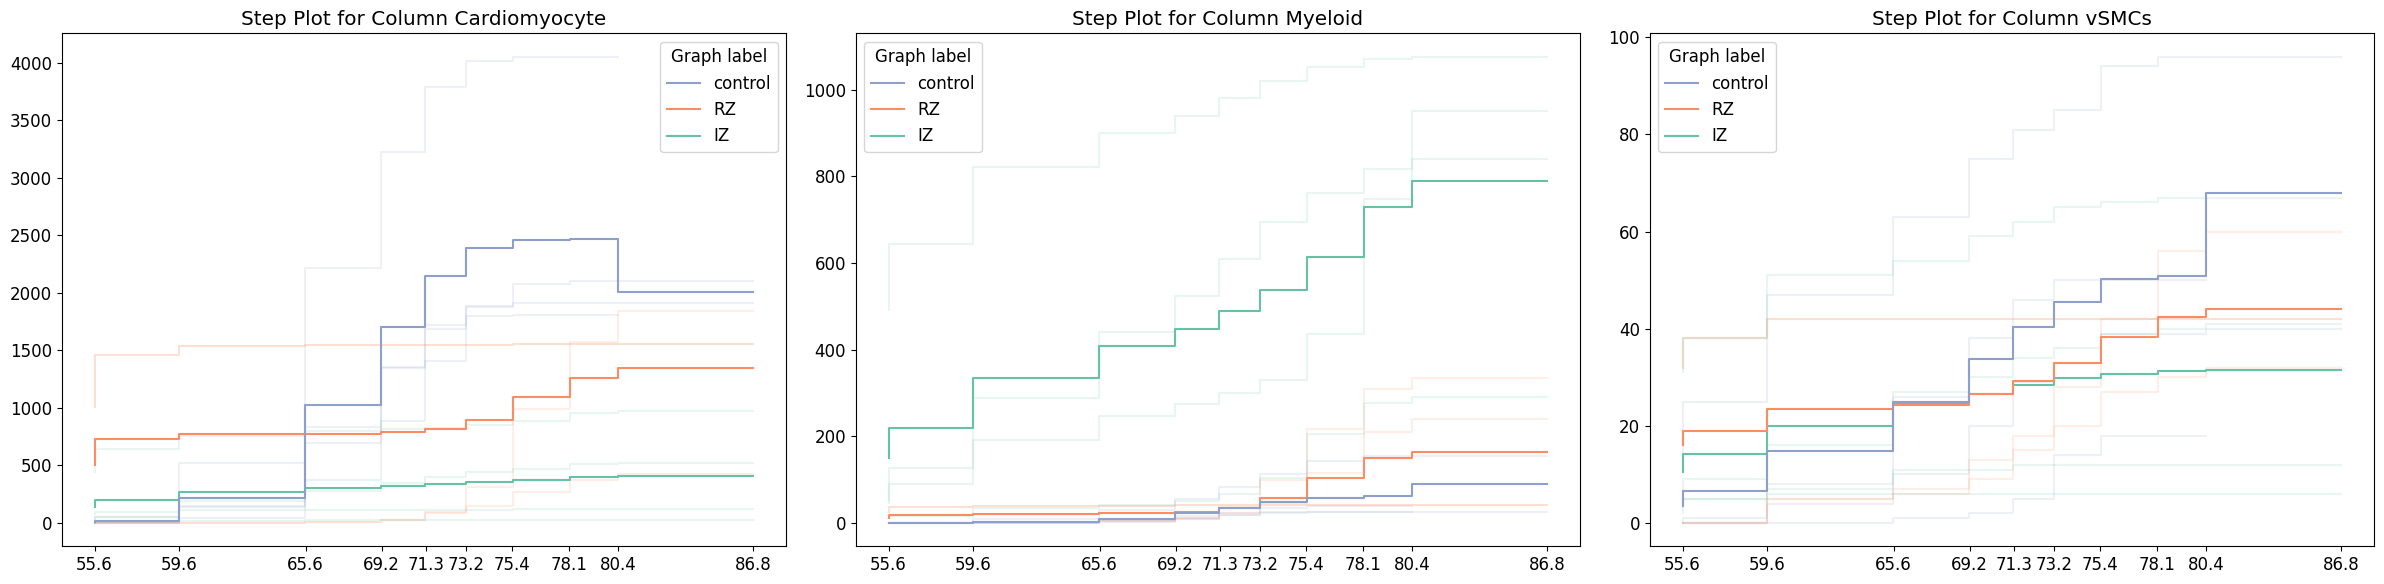

In [18]:
gc.pl._filtration_curves.compare_conditions(
        adata,
        node_labels=["Cardiomyocyte", "Myeloid", "vSMCs"]
)